<div style="text-align: center; color: blue; font-size: 24px; font-weight: 700;">
  Decision Trees
</div>

    

## Objectives

* Develop a classification model using Decision Tree Algorithm
* Apply Decision Tree classification on a real world dataset.


## Introduction

Explores decision tree classification, a powerful machine learning technique for making data-driven decisions.Learn to build, visualize, and evaluate decision trees using a real-world dataset. The dataset used in this that of Drug prediction based on the health parameters of a patient.


In [1]:
pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

<div style = "font-size:20px; text-align:center;font-weight:bold" >About the dataset</div>


Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.

In [26]:
path= 'Downloads/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Analysis and pre-processing
Apply some basic analytics steps to understand the data better. First, let us gather some basic information about the dataset. 


In [8]:
my_data.info()
my_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<b>This tells us that 4 out of the 6 features of this dataset are categorical, which will have to be converted into numerical ones to be used for modeling. For this, we can make use of LabelEncoder from the Scikit-Learn library.</b>

In [42]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,167,drugY,4
1,47,1,1,0,89,drugC,2
2,47,1,1,0,43,drugC,2
3,28,0,2,0,10,drugX,3
4,61,0,1,0,133,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,69,drugC,2
196,16,1,1,0,75,drugC,2
197,52,1,2,0,36,drugX,3
198,23,1,2,1,102,drugX,3


With this, we've now 5 parameters that can be used for modeling and 1 feature as the target variable. 
We can see from comparison of the data before Label encoding and after it, to note the following mapping.
<br>
For parameter 'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
For parameter 'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
For parameter 'Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$


To evaluate the correlation of the target variable with the input features, it will be convenient to map the different drugs to a numerical value. Execute the following cell to achieve the same.

In [52]:
drug_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(drug_map)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,167,drugY,4
1,47,1,1,0,89,drugC,2
2,47,1,1,0,43,drugC,2
3,28,0,2,0,10,drugX,3
4,61,0,1,0,133,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,69,drugC,2
196,16,1,1,0,75,drugC,2
197,52,1,2,0,36,drugX,3
198,23,1,2,1,102,drugX,3


In [53]:
my_data.drop(['Drug'],axis=1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.624663
Drug_num       1.000000
Name: Drug_num, dtype: float64

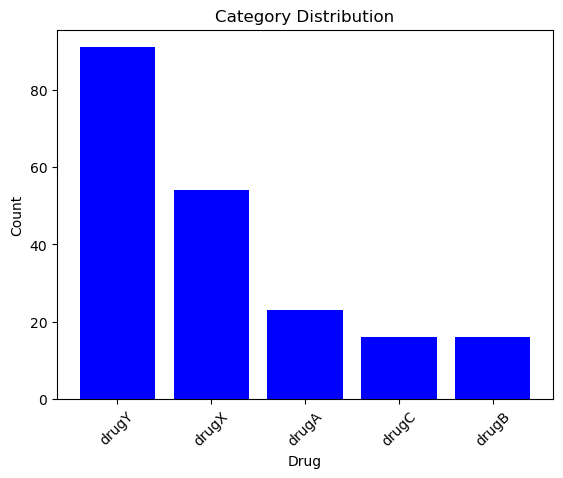

In [54]:
category_count = my_data['Drug'].value_counts()
plt.bar(category_count.index , category_count.values , color= 'blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation = 45)
plt.show()

<div style = "text-align : center;font-size: 20px; font-weight:bold">Modeling</div> 

For modeling this dataset with a Decision tree classifier, we first split the dataset into training and testing subsets. For this, we separate the target variable from the input variables.

In [55]:
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)

In [56]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [69]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluation

In [70]:
tree_predictions = drugTree.predict(X_testset)

print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  1.0


### Visualize the tree

To understand the classification criteria derived by the Decision Tree, we may generate the tree plot.


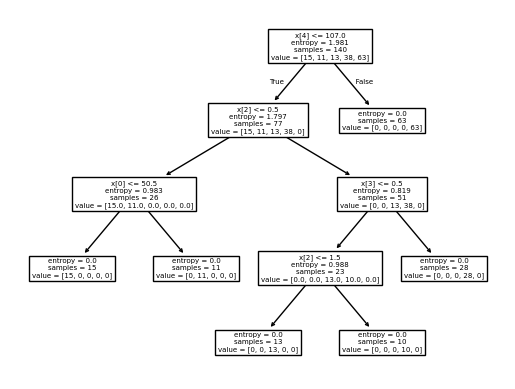

In [71]:
plot_tree(drugTree)
plt.show()


Drug A : $Na\_to\_K <= 107.0,\ BP = High,\ Age <= 50.5$<br>
Drug B : $Na\_to\_K <= 107.0,\ BP = High,\ Age > 50.5$<br>
Drug C : $Na\_to\_K <= 107.0,\ BP = Low,\ Cholesterol <= High$<br>
Drug X : $Na\_to\_K <= 107.0,\ BP = Normal,\ Cholesterol = High$